In [1]:
import pandas as pd
%pylab inline

df = pd.read_csv('data/MMI_gender_prediction.csv', index_col = 0)
df.head()


Populating the interactive namespace from numpy and matplotlib


,chrX_mean_depth,pred_gender,gender,consistent
MMI001,19.322773,M,M,True
MMI002,37.040048,F,F,True
MMI003,23.854752,M,M,True
MMI004,46.977884,F,F,True
MMI005,30.219566,F,F,True


In [2]:
data_map = {}

for subject in df.index:
    sex = df.loc[subject, 'gender']
    res = ! python3 low_coverage_analysis.py --id {subject} --out out/{subject} --sex {sex}
    print(res[-1])
    data_map[subject] = [int(item) for item in res[-1].split()]

0 0 0
0 0 0
0 0 0
0 0 0
1 1 1
1 1 1
1 1 1
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
1 1 1
0 0 0
0 0 0
0 0 0
1 1 1
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
1 1 1
1 5 0
1 1 0
2 5 1


In [3]:
data_map = {}

for subject in df.index:
    sex = df.loc[subject, 'gender']
    res = ! python3 low_coverage_analysis.py --id {subject} --out out/{subject} --sex {sex}
    print(res[-1])
    data_map[subject] = [int(item) for item in res[-1].split()]

0 0 0
0 2 1
0 0 0
0 2 1
1 2 2
1 2 2
1 2 2
0 2 2
0 2 2
0 0 0
0 2 2
0 2 2
0 2 2
0 2 1
0 0 0
0 2 2
0 2 1
0 0 0
0 2 1
0 2 1
0 2 1
0 2 1
0 2 2
0 3 2
0 2 2
0 2 2
1 2 2
0 2 1
0 2 1
0 2 1
1 2 2
0 2 2
0 2 1
0 2 1
0 2 1
0 2 2
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
1 2 2
1 6 1
1 3 2
2 5 1


In [3]:
df = pd.read_csv('data/WES_gender_prediction.csv', index_col = 0)
df.head()

,mean depth,length,gender
wes001,41.197802,91,M
wes002,72.318681,91,F
wes003,43.824176,91,F
wes004,132.021978,91,F
wes005,24.472527,91,M


In [4]:
from glob import glob
vcf_del = glob('/home/dna/webb/low_coverage_test/whole_exon_out/*/vcf_scan/report_vcf_del.txt')

In [8]:
for vd, subject in zip(vcf_del, df.index):
    sex = df.loc[subject, 'gender']
    print(f'--id {subject} --out out/{subject} --sex {sex} --vd {vd}')
    res = ! python3 low_coverage_analysis.py --id {subject} --out out/{subject} --sex {sex} --vd {vd}
    print(res[-1])
    data_map[subject] = [int(item) for item in res[-1].split()]

--id wes001 --out out/wes001 --sex M --vd /home/dna/webb/low_coverage_test/whole_exon_out/WES001/vcf_scan/report_vcf_del.txt
5 3 1
--id wes002 --out out/wes002 --sex F --vd /home/dna/webb/low_coverage_test/whole_exon_out/WES002/vcf_scan/report_vcf_del.txt
6 3 1
--id wes003 --out out/wes003 --sex F --vd /home/dna/webb/low_coverage_test/whole_exon_out/WES003/vcf_scan/report_vcf_del.txt
6 3 1
--id wes004 --out out/wes004 --sex F --vd /home/dna/webb/low_coverage_test/whole_exon_out/WES004/vcf_scan/report_vcf_del.txt
6 6 1
--id wes008 --out out/wes008 --sex F --vd /home/dna/webb/low_coverage_test/whole_exon_out/WES008/vcf_scan/report_vcf_del.txt
6 4 1
--id wes009 --out out/wes009 --sex M --vd /home/dna/webb/low_coverage_test/whole_exon_out/WES009/vcf_scan/report_vcf_del.txt
6 4 1
--id wes010 --out out/wes010 --sex F --vd /home/dna/webb/low_coverage_test/whole_exon_out/WES010/vcf_scan/report_vcf_del.txt
7 5 1
--id wes011 --out out/wes011 --sex F --vd /home/dna/webb/low_coverage_test/whole_ex

In [9]:
new_keys = [f'MMI{i:03}' for i in range(1,49) if i not in [5,45,46,47,48]]
new_keys += [f'MMI{i:03}' for i in [5,45,46,47,48]]
new_keys.remove('MMI007')
new_keys.remove('MMI036')
new_keys += [f'wes{i:03}' for i in range(1,12)]

In [10]:
draft_keys = [f'wgs40x{i:02}' for i in range(1,42)] + [f'wgs30x{i:02}' for i in range(1,6)] + [f'wes{i:02}' for i in range(1,12)]

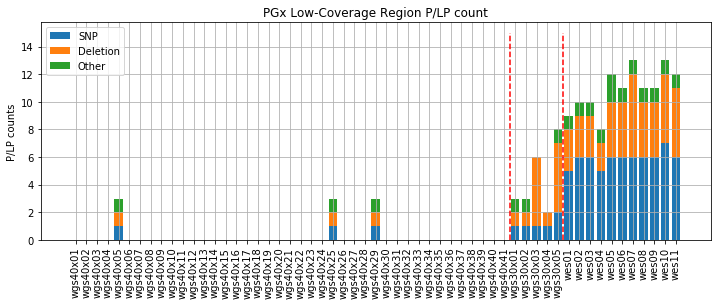

In [11]:
single_cnts1 = [data_map[k][0] for k in new_keys]
del_cnts1 = np.array([data_map[k][1] for k in new_keys])
other_cnts1 = np.array([data_map[k][2] for k in new_keys])

plt.figure(figsize(12,4))
plt.title('PGx Low-Coverage Region P/LP count')
plt.bar(draft_keys, single_cnts1, label='SNP')
plt.bar(draft_keys, del_cnts1, bottom=single_cnts1, label='Deletion')
plt.bar(draft_keys, other_cnts1, bottom=single_cnts1+del_cnts1, label='Other')
plt.vlines(40.5,0,15,'r',linestyles='dashed')
plt.vlines(45.5,0,15,'r',linestyles='dashed')
plt.xticks(rotation=90)
plt.ylabel('P/LP counts')
plt.legend()
plt.grid()
plt.savefig('PGx_PLP_cnt.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
wgs30x = [f'MMI{i:03}' for i in [5,45,46,47,48]]
wgs40x = [f'MMI{i:03}' for i in range(1,45) if i not in [5, 7, 36]]
wes = [f'wes{i:03}' for i in range(1,12)]
for key in [wgs40x, wgs30x, wes]:
    print(np.mean([sum(data_map[k]) for k in key]))

0.21951219512195122
4.4
10.909090909090908


In [27]:
[data_map[k] for k in key]

[[5, 3, 1],
 [6, 3, 1],
 [6, 3, 1],
 [5, 2, 1],
 [6, 4, 2],
 [6, 4, 1],
 [6, 6, 1],
 [6, 4, 1],
 [6, 4, 1],
 [7, 5, 1],
 [6, 5, 1]]

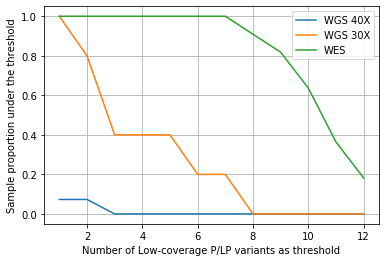

In [30]:
wgs40x = np.arange(41)
wgs30x = np.arange(5) + len(wgs40x)
wes = np.arange(11)+len(wgs40x)+len(wgs30x)

single_cnts1 = np.array([data_map[k][0] for k in new_keys])
del_cnts1 = np.array([data_map[k][1] for k in new_keys])
other_cnts1 = np.array([data_map[k][2] for k in new_keys])


chance_to_miss = {'WGS 40X':(single_cnts1[wgs40x]+del_cnts1[wgs40x]+other_cnts1[wgs40x]), 
                  'WGS 30X':(single_cnts1[wgs30x]+del_cnts1[wgs30x]+other_cnts1[wgs30x]), 
                  'WES': (single_cnts1[wes] + del_cnts1[wes]+other_cnts1[wes])} 

prob_of_n_variant_thrd = (np.arange(12)+1)

curve = {k:[] for k in chance_to_miss.keys()}

for thrd in prob_of_n_variant_thrd:
    for k,v in chance_to_miss.items():
        curve[k].append(len(v[v>thrd])/len(v))
        
plt.figure(figsize=(6,4))
for k,v in curve.items():
    plt.plot(np.arange(12)+1, v, label=k)
plt.legend()
plt.xlabel('Number of Low-coverage P/LP variants as threshold')
plt.ylabel('Sample proportion under the threshold')
#plt.title('Model of pathogenicity under P/LP thresholds')
plt.grid()
plt.savefig('prob_get_PLP.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
def count_exon(annotate_exon_file):
    internal_cnt, external_cnt = 0, 0
    with open(annotate_exon_file, 'r') as rh:
        for line in rh:
            tail = line.split('\t')[-1]
            if 'internal' in tail:
                internal_cnt += 1
            elif 'junction' in tail:
                external_cnt += 1
    return internal_cnt, external_cnt

In [16]:
exon_map = {}

for subject in data_map.keys():
    exon_map[subject] = count_exon(f'out/{subject}/{subject}_coverage_check_filter.txt')

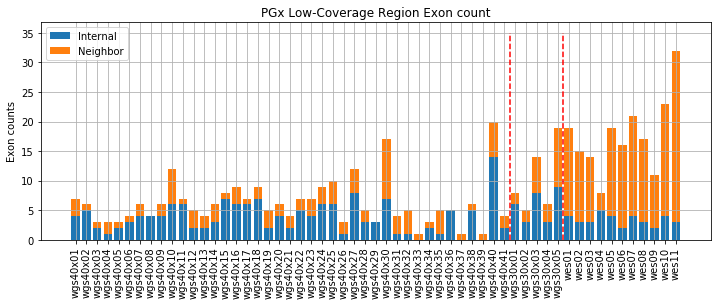

In [17]:
single_cnts1 = [exon_map[k][0] for k in new_keys]
del_cnts1 = np.array([exon_map[k][1] for k in new_keys])

plt.figure(figsize(12,4))
plt.title('PGx Low-Coverage Region Exon count')
plt.bar(draft_keys, single_cnts1, label='Internal')
plt.bar(draft_keys, del_cnts1, bottom=single_cnts1, label='Neighbor')
plt.vlines(40.5,0,35,'r',linestyles='dashed')
plt.vlines(45.5,0,35,'r',linestyles='dashed')
plt.xticks(rotation=90)
plt.ylabel('Exon counts')
plt.legend()
plt.grid()
plt.savefig('PGx_exon_cnt.png', dpi=300, bbox_inches='tight')
plt.show()

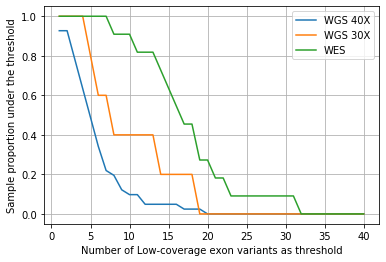

In [18]:
single_cnts1 = np.array(single_cnts1)
del_cnts1 = np.array(del_cnts1)
other_cnts1 = np.array(other_cnts1)

chance_to_miss = {'WGS 40X':(single_cnts1[wgs40x] + del_cnts1[wgs40x]), 
                  'WGS 30X':(single_cnts1[wgs30x] + del_cnts1[wgs30x]), 
                  'WES': (single_cnts1[wes] + del_cnts1[wes])}

prob_of_n_variant_thrd = (np.arange(40)+1)

curve = {k:[] for k in chance_to_miss.keys()}

for thrd in prob_of_n_variant_thrd:
    for k,v in chance_to_miss.items():
        curve[k].append(len(v[v>thrd])/len(v))

plt.figure(figsize=(6,4))
for k,v in curve.items():
    plt.plot(np.arange(40)+1, v, label=k)
plt.legend()
plt.xlabel('Number of Low-coverage exon variants as threshold')
plt.ylabel('Sample proportion under the threshold')
#plt.title('Model of pathogenicity under P/LP thresholds')
plt.grid()
plt.savefig('prob_get_exon.png', dpi=300, bbox_inches='tight')
plt.show()

### Low-coverage total length

In [19]:
# from candidate regions
from glob import glob

candidates = glob(f'out/*/*low_coverage_candidate.txt')
low_cov_length = {}
for path in candidates:
    with open(path, 'r') as rh:
        idx = path.split('/')[-1][:6]
        total_len = 0
        for line in rh:
            total_len += int(line.split('\t')[1])           
    low_cov_length[idx] = total_len

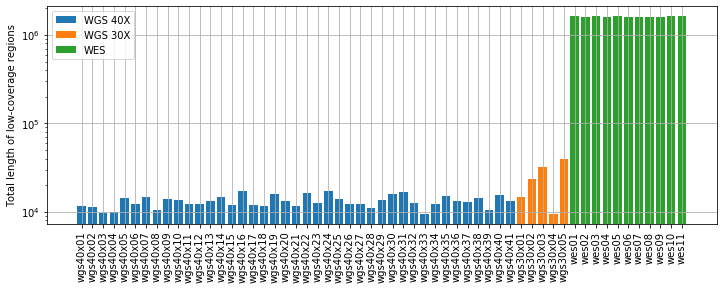

In [20]:
wgs30x = [f'MMI{i:03}' for i in [5,45,46,47,48]]
wgs40x = [f'MMI{i:03}' for i in range(1,45) if i not in [5, 7, 36]]
wes = [f'wes{i:03}' for i in range(1,12)]

plt.bar(draft_keys[:len(wgs40x)], [low_cov_length[k] for k in wgs40x], label='WGS 40X')
plt.bar(draft_keys[len(wgs40x):len(wgs40x)+len(wgs30x)], [low_cov_length[k] for k in wgs30x], label='WGS 30X')
plt.bar(draft_keys[len(wgs40x)+len(wgs30x):], [low_cov_length[k] for k in wes], label='WES')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Total length of low-coverage regions')
plt.yscale('log')
plt.savefig('total_low_cov_length.png', dpi=300, bbox_inches='tight')
plt.show()   

In [21]:
wgs40x_length = [low_cov_length[k] for k in wgs40x]
wgs30x_length =  [low_cov_length[k] for k in wgs30x]
wes_length = [low_cov_length[k] for k in wes]

for item in [wgs40x_length, wgs30x_length, wes_length]:
    print(np.mean(item), np.std(item))

13144.560975609756 2020.218209039715
23768.8 10989.376349911763
1609341.8181818181 7849.02699028452


In [40]:
wgs40x_length

[11636,
 11329,
 9729,
 10044,
 14394,
 12236,
 14817,
 10499,
 13882,
 13659,
 12327,
 12084,
 8029,
 14805,
 11995,
 11929,
 11822,
 11461,
 15972,
 13233,
 11520,
 16237,
 12427,
 17230,
 13809,
 12177,
 12188,
 10901,
 13502,
 16038,
 16734,
 12548,
 9409,
 12094,
 15127,
 13066,
 12927,
 8949,
 10489,
 15562,
 7977]

In [29]:
from lib.utils import bed_length

wes_new_lenght = {}
wes_bed = '/home/dna/webb/low_coverage_test/acmg_analyze/AgilentV7.bed'

for candidate in glob('out/wes*/*.low_coverage_candidate.txt'):
    idx = candidate.split('/')[-1][:6]
    with open(candidate, 'r') as rh:
        lines = rh.readlines()
        lines = [re.sub(r':|-','\t',line) for line in lines]
        candidate_bed = candidate.replace('.txt', '.bed')
        with open(candidate_bed, 'w') as wh:
            for line in lines:
                wh.write(line)
    res_bed = candidate_bed.replace('_candidate','_candidate_intersect')
    ! bedtools intersect -a {candidate_bed} -b {wes_bed} > {res_bed}
    wes_new_lenght[idx] = bed_length(res_bed)
    

In [30]:
wes_new_lenght

{'wes001': 1676,
 'wes002': 2002,
 'wes003': 2271,
 'wes004': 1801,
 'wes005': 1467,
 'wes006': 1429,
 'wes007': 1721,
 'wes008': 2222,
 'wes009': 2208,
 'wes010': 2050,
 'wes011': 2304}

### Mean total depth

In [80]:
missmi_lib_dir = '/home/missmi/bin/missmi.scripts/missmi_tools/missmi_tools/missmi_lib/workflows/missmi_parse_pgx/bin/lib'
pgx_bed = f'{missmi_lib_dir}/db_pgx20/20210501/GRCh37_latest_genomic.gene.pgx20_latest.rename.slopped.bed'
wes_bed = f'/home/dna/webb/low_coverage_test/acmg_analyze/AgilentV7.bed'

def check_mean_depth(bam_dir, bed, thrd=1):
    '''
    return mean depth from all effective acmg regions
    '''
    depth_sum = 0
    depth_length = 0

    coverage = !samtools depth -Q {thrd} -b {bed} {bam_dir}
    dp_bases = [int(base.split('\t')[2]) for base in coverage]
    
    
    base_sum = sum(dp_bases)
    base_length = len(dp_bases)
    chr_depth = base_sum/base_length #len(dp_bases)
        
    return chr_depth, base_length

In [84]:
sample_mean_depth = {}

pgx_bam_files = glob('out/*/*_pgx.bam')

for path in pgx_bam_files:
    idx = path.split('/')[-1][:6]
    print(idx)
    if 'wes' in path:
        sample_mean_depth[idx] = check_mean_depth(path, wes_bed)
    else:
        sample_mean_depth[idx] = check_mean_depth(path, pgx_bed)

MMI001
MMI002
MMI003
MMI004
MMI005
MMI006
MMI007
MMI008
MMI009
MMI010
MMI011
MMI012
MMI013
MMI014
MMI015
MMI016
MMI017
MMI018
MMI019
MMI020
MMI021
MMI022
MMI023
MMI024
MMI025
MMI026
MMI027
MMI028
MMI029
MMI030
MMI031
MMI032
MMI033
MMI034
MMI035
MMI036
MMI037
MMI038
MMI039
MMI040
MMI041
MMI042
MMI043
MMI044
MMI045
MMI046
MMI047
MMI048
wes001
wes002
wes003
wes004
wes005
wes006
wes007
wes008
wes009
wes010
wes011


In [87]:
wgs30x = [f'MMI{i:03}' for i in [5,45,46,47,48]]
wgs40x = [f'MMI{i:03}' for i in range(1,45) if i not in [5, 7, 36]]
wes = [f'wes{i:03}' for i in range(1,12)]

In [88]:
wes_coverage = [sample_mean_depth[k][0] for k in wes]
wgs40x_coverage = [sample_mean_depth[k][0] for k in wgs40x]
wgs30x_coverage = [sample_mean_depth[k][0] for k in wgs30x]

In [89]:
for item in [wes_coverage, wgs40x_coverage, wgs30x_coverage]:
    print(np.mean(item), np.std(item))

133.91914783494113 23.34741400396195
36.35056188854599 4.380565404691813
31.970893986216264 7.9752726712846975


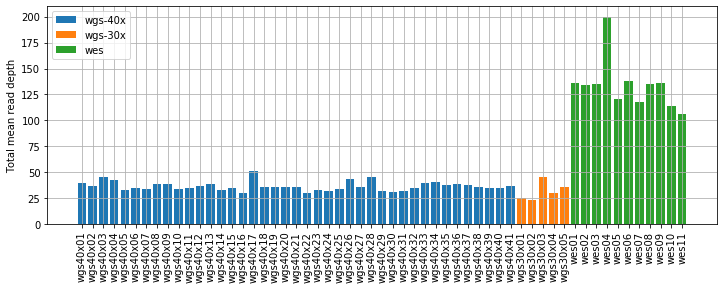

In [90]:
len_wgs40x, len_wgs30x, len_wes = len(wgs40x_coverage), len(wgs30x_coverage), len(wes_coverage)
fig, ax = plt.subplots(figsize=(12,4))
ax.set_ylabel('Total mean read depth')
ax.bar(draft_keys[:len_wgs40x], wgs40x_coverage, label='wgs-40x')
ax.bar(draft_keys[len_wgs40x:len_wgs40x+len_wgs30x], wgs30x_coverage, label='wgs-30x')
ax.bar(draft_keys[len_wgs40x+len_wgs30x:], wes_coverage, label='wes')
ax.set_xticklabels(draft_keys, rotation=90)
ax.legend(loc='upper left')
ax.grid(b=True)
plt.savefig('total_mean_depth.png', dpi=300, bbox_inches='tight')
plt.show()

### Depth of PGx

In [1]:
def check_chr(bam_dir, thrd=1):
    '''
    return mean depth from all acmg regions except sex chromosome
    '''
    chr_depth = {}
    depth_sum = 0
    depth_length = 0
    for i in range(1,23):
        region = f"chr{i}"
        coverage = !samtools depth -Q {thrd} -r {region} {bam_dir}
        dp_bases = [int(base.split('\t')[2]) for base in coverage]
        #input(dp_bases)
        if len(dp_bases)>0:
            base_sum = sum(dp_bases)
            base_length = len(dp_bases)
            chr_depth[region] = base_sum/base_length #len(dp_bases)
            chr_depth[f'chr{i}_length'] = base_length
            depth_sum += base_sum
            depth_length += base_length
            
        else:
            continue
            
    chr_depth['total_mean'] = depth_sum/depth_length
    return chr_depth

In [2]:
# Depth of PGx
from glob import glob

pgx_bam_files = glob('out/*/*_pgx.bam')
sample_chr_depth = {}

for path in pgx_bam_files:
    idx = path.split('/')[-1][:6]
    print(idx)
    sample_chr_depth[idx] = check_chr(path)

MMI003
MMI004
MMI005
MMI006
MMI007
MMI008
MMI009
MMI010
MMI011
MMI012
MMI013
MMI014
MMI015
MMI016
MMI017
MMI019
MMI020
MMI021
MMI022
MMI023
MMI024
MMI025
MMI026
MMI027
MMI028
MMI029
MMI030
MMI031
MMI032
MMI033
MMI034
MMI035
MMI036
MMI037
MMI038
MMI039
MMI040
MMI041
MMI042
MMI043
MMI044
MMI045
MMI046
MMI047
MMI048
wes001
wes002
wes003
wes004
wes005
wes006
wes007
wes008
wes009
wes010
wes011


In [6]:
wgs30x = [f'MMI{i:03}' for i in [5,45,46,47,48]]
wgs40x = [f'MMI{i:03}' for i in range(1,45) if i not in [5, 7, 36]]
wes = [f'wes{i:03}' for i in range(1,12)]

wgs30x_coverage = [sample_chr_depth[item]['total_mean'] for item in wgs30x]
wgs40x_coverage = [sample_chr_depth[item]['total_mean'] for item in wgs40x]
wes_coverage = [sample_chr_depth[item]['total_mean'] for item in wes]

In [7]:
import pandas as pd

df_coverage_total = pd.DataFrame({'Coverage':wgs40x_coverage+wgs30x_coverage+wes_coverage, 
                                  'Type':['WGS 40X']*41+['WGS 30X']*5+['WES']*11,
                                 })
df_coverage_total.shape

(57, 2)

In [8]:
coverage_all, position, method = [], [], []

for key in sample_chr_depth['MMI001'].keys():
    coverage_all += [sample_chr_depth[item][key] for item in wgs40x] + \
                    [sample_chr_depth[item][key] for item in wgs30x] + \
                    [sample_chr_depth[item][key] for item in wes]
    position += [key]*57
    method +=  ['WGS 40X']*41+['WGS 30X']*5+['WES']*11
    
df_t = pd.DataFrame({'Coverage': coverage_all,
                     'Position': position,
                     'Method': method
                    })
df_t.head()

,Coverage,Position,Method
0,40.709479,chr1,WGS 40X
1,37.070429,chr1,WGS 40X
2,45.971662,chr1,WGS 40X
3,40.948752,chr1,WGS 40X
4,33.145546,chr1,WGS 40X


In [23]:
for method in df_t['Method'].unique():
    print(method)
    cond = df_t['Method']==method
    cond2 = ['length' not in item for item in df_t['Position']]
    res = df_t['Coverage'][cond & cond2]
    print(res.mean(), res.std())
    

WGS 40X
36.39532163159959 6.40355278072118
WGS 30X
31.89103599744815 8.70238396522532
WES
41.44857361594092 29.781894695058938


In [15]:
df_t['Position'].unique()

array(['chr1', 'chr1_length', 'chr2', 'chr2_length', 'chr6',
       'chr6_length', 'chr7', 'chr7_length', 'chr10', 'chr10_length',
       'chr12', 'chr12_length', 'chr13', 'chr13_length', 'chr16',
       'chr16_length', 'chr19', 'chr19_length', 'chr22', 'chr22_length',
       'total_mean'], dtype=object)

Populating the interactive namespace from numpy and matplotlib


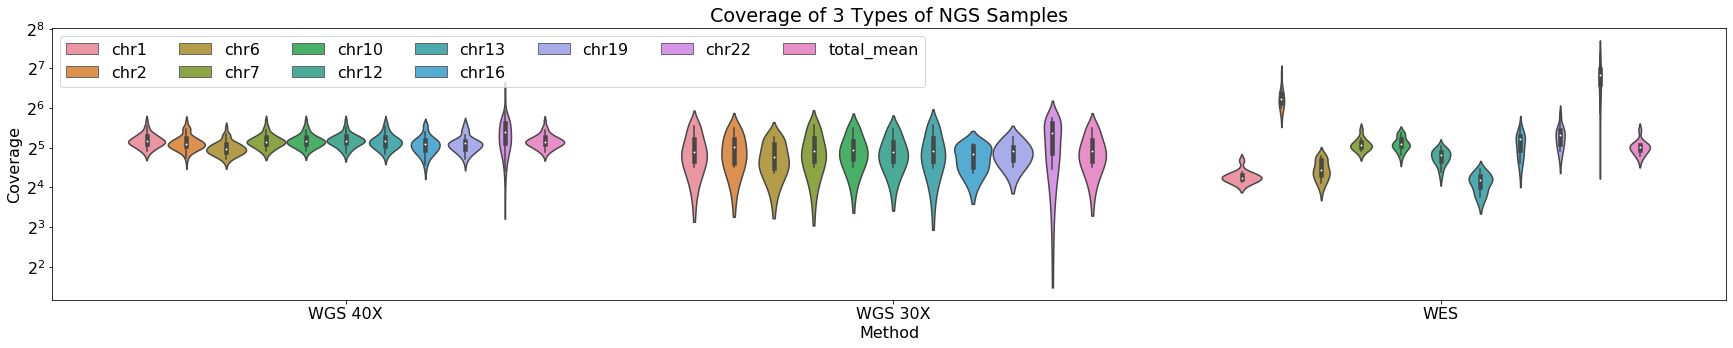

In [9]:
import seaborn as sn
%pylab inline

pos_cond = [True if '_length' not in k else False for k in df_t['Position']]

plt.figure(figsize=(30,5))
original_fs = plt.rcParams['font.size']
plt.rcParams['font.size'] = '16'
sn.violinplot(x='Method',y='Coverage',hue='Position',data=df_t[pos_cond]).set_title('Coverage of 3 Types of NGS Samples')
plt.legend(loc='upper left',ncol=7)
#plt.yscale('log')
plt.semilogy(basey=2)
#plt.hlines(10,0.5,1.5,colors='r', linestyles='dashed')
#plt.yticks([8,16,24,32,64,128,256],[8,16,24,32,64,128,256])
plt.savefig('PGx_cov_chr.png', dpi=300, bbox_inches='tight')
plt.show()
plt.rcParams['font.size'] = original_fs

#### Case for CYP2D6

In [38]:
CYP2D6_exon = {'1':"chr22:42526614-42526812",
               '2':"chr22:42525740-42525911",
               '3':"chr22:42525035-42525187",
               '4':"chr22:42524786-42524946",
               '5':"chr22:42524176-42524352",
               '6':"chr22:42523844-42523985",
               '7':"chr22:42523449-42523636",
               '8':"chr22:42522853-42522994",
               '9':"chr22:42522501-42522754"}
#'all':"chr22:42522501-42526812"

def check_regions(bam_dir, regions, thrd=1):
    '''
    return mean depth from all acmg regions except sex chromosome
    '''
    region_depth = {}

    for k,region in regions.items():
        coverage = !samtools depth -Q {thrd} -r {region} {bam_dir}
        dp_bases = [int(base.split('\t')[2]) for base in coverage]
        #input(dp_bases)
        if len(dp_bases)>0:
            region_depth[f'exon_{k}'] = dp_bases
            
        else:
            continue
            
    return region_depth

In [36]:
!ls /home/dna/webb/low_coverage_test/open_bam/wes001.realigned.bam

/home/dna/webb/low_coverage_test/open_bam/wes001.realigned.bam


In [39]:
bam_file = '/home/dna/webb/low_coverage_test/open_bam/wes001.realigned.bam'

wes001_CYP2D6 = check_regions(bam_file, CYP2D6_exon)

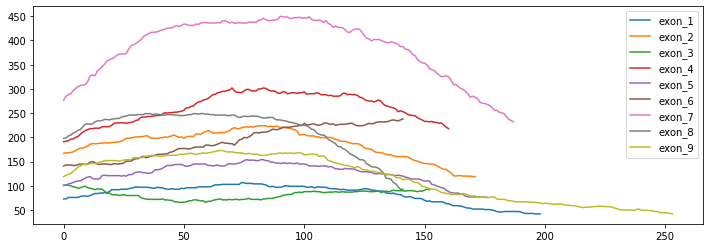

In [41]:
for k,v in wes001_CYP2D6.items():
    plt.plot(v, label=k)
plt.legend()
plt.show()

In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def normalize_2d_coverage(coverage_dic):
    norm_coverage_dic = {}

    scaler = MinMaxScaler()
    all_values = []
    for v in coverage_dic.values():
        all_values += v

    #scaler.fit(np.array(all_values)[:,np.newaxis])
    scaler.fit(np.array([0,max(all_values)])[:,np.newaxis])

    for k,v in coverage_dic.items():   
        y = scaler.transform(np.array(v)[:,np.newaxis])
        x = np.linspace(0,1,len(y))
        norm_coverage_dic[k] = (x,y)
    
    return norm_coverage_dic

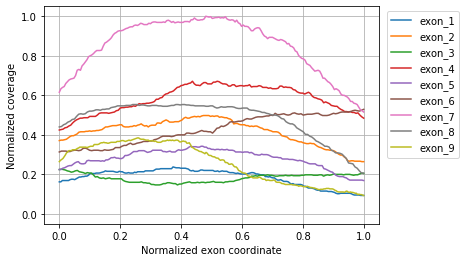

In [70]:
norm_wes001_CYP2D6 = normalize_2d_coverage(wes001_CYP2D6)

plt.figure(figsize=(6,4))
for k,v in norm_wes001_CYP2D6.items():
    plt.plot(v[0],v[1], label=k)
plt.xlabel('Normalized exon coordinate')
plt.ylabel('Normalized coverage')
plt.ylim(-0.05,1.05)
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

In [42]:
bam_file = '/home/dna/webb/low_coverage_test/open_bam/MMI001.realigned.bam'

MMI001_CYP2D6 = check_regions(bam_file, CYP2D6_exon)

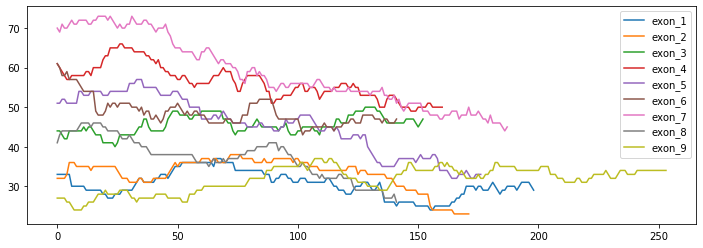

In [43]:
for k,v in MMI001_CYP2D6.items():
    plt.plot(v, label=k)
plt.legend()
plt.show()

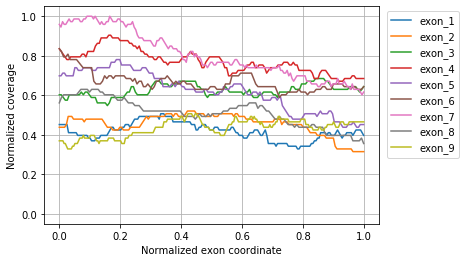

In [69]:
norm_MMI001_CYP2D6 = normalize_2d_coverage(MMI001_CYP2D6)

plt.figure(figsize=(6,4))
for k,v in norm_MMI001_CYP2D6.items():
    plt.plot(v[0],v[1], label=k)
plt.xlabel('Normalized exon coordinate')
plt.ylabel('Normalized coverage')
plt.ylim(-0.05,1.05)
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

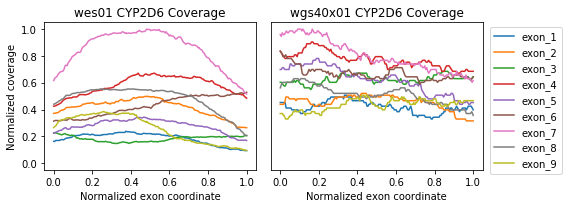

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
for k,v in norm_wes001_CYP2D6.items():
    ax1.plot(v[0],v[1], label=k)
for k,v in norm_MMI001_CYP2D6.items():
    ax2.plot(v[0],v[1], label=k)
ax1.set_ylim(-0.05,1.05)
ax1.set_ylabel('Normalized coverage')
ax1.set_xlabel('Normalized exon coordinate')
ax1.set_title('wes01 CYP2D6 Coverage')
ax2.yaxis.set_visible(False)
ax2.set_xlabel('Normalized exon coordinate')
ax2.set_ylim(-0.05,1.05)
ax2.set_title('wgs40x01 CYP2D6 Coverage')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.tight_layout()
plt.savefig('CYP2D6_case_cmp.png', dpi=300, bbox_inches='tight')
plt.show()